In [1]:
from datetime import date, timedelta
from constants import *
from bars import plot_bars as plot_areas, unique_people_tested, daily_vaccinations, population_vaccinated
from phe import *
from phe import map_data as phe_map_data, latest_changes
from zoe import latest_map_data as zoe_map_data
from plotting import *
from vaccination import vaccination_dashboard, vaccination_changes
for_date = '*'

In [2]:
latest_changes(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum)

Latest for England:
17,998 cases (7 day average) as of Wed 30 Jun, +1,274.7 since Tue 29 Jun
287 hospitalised (7 day average) as of Sat 03 Jul, +43.1 since Wed 30 Jun
14 died (7 day average) as of Wed 30 Jun, +1.9 since Tue 29 Jun


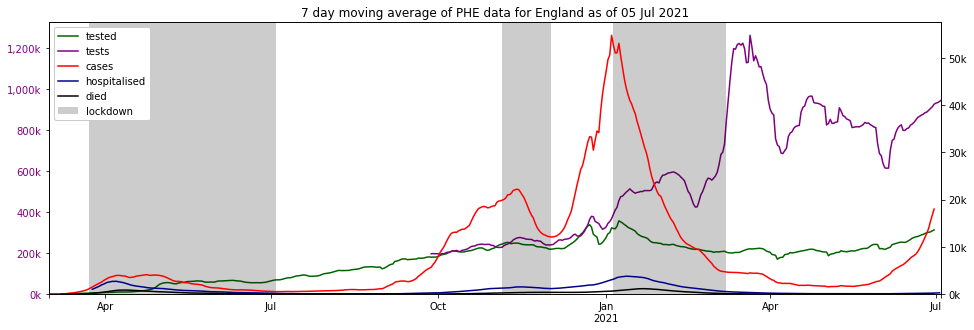

In [3]:
plot_summary(left_series=(s.unique_people_tested_sum, s.new_virus_tests_sum),
             right_series=(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum))

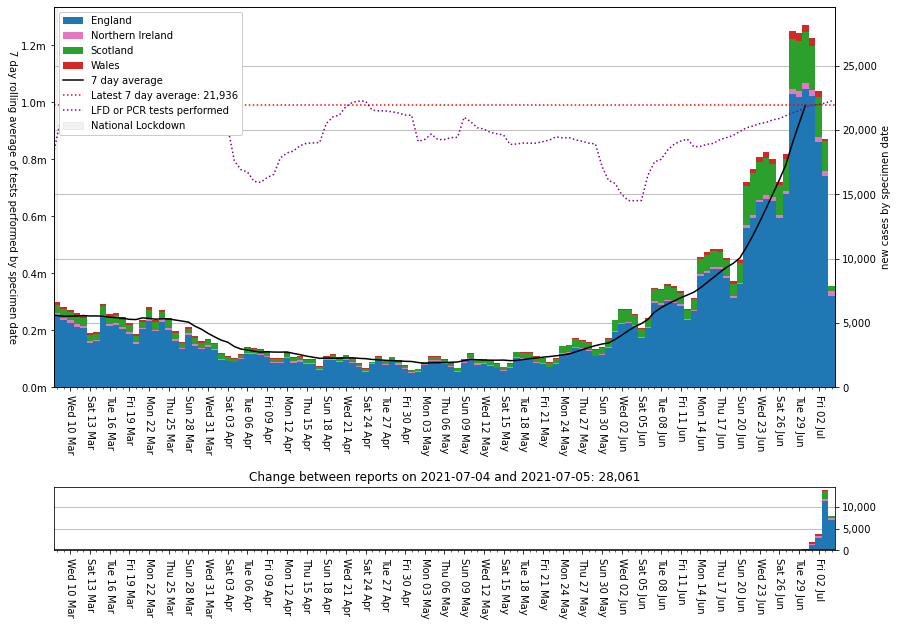

In [4]:
plot_areas(for_date, 'cases_nations', earliest=lockdown3[1], date_format='%a %d %b')

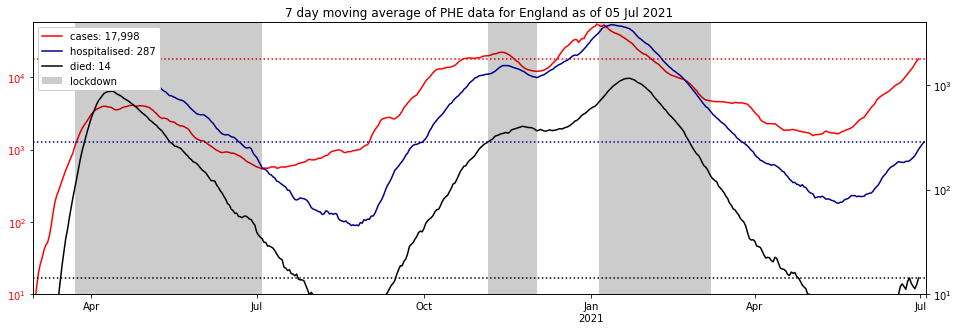

In [25]:
plot_summary(earliest_date='2020-02-29', show_latest='lines', log=True,
             left_series=(s.new_cases_sum,),
             right_series=(s.new_admissions_sum, s.new_deaths_sum))

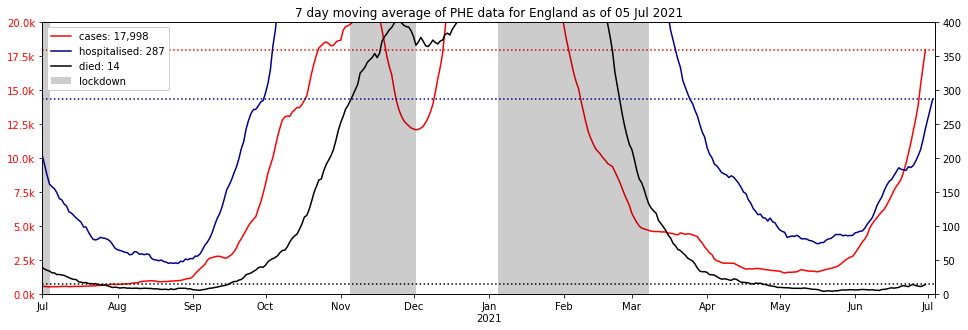

In [19]:
plot_summary(earliest_date='2020-07-01', show_latest='lines',
             left_series=(s.new_cases_sum,), left_formatter=per0k_formatter, left_ymax=20_000,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0_formatter, right_ymax=400)

In [7]:
vaccination_changes()

,,Complete (Total),First Dose (Total),Second Dose (Total),Complete (New),First Dose (New),Second Dose (New)
,,,,,,,
England,04 Jul 21,"+28,324,385","+38,044,157","+28,324,385","+85,748","+62,672","+85,748"
Northern Ireland,04 Jul 21,"+897,209","+1,173,365","+897,209","+6,874","+1,712","+6,874"
Scotland,04 Jul 21,"+2,774,136","+3,869,223","+2,774,136","+11,980","+11,639","+11,980"
Wales,04 Jul 21,"+1,730,632","+2,264,974","+1,730,632","+6,808","+1,199","+6,808"


,areaName,areaCode,full,any,partial,population,full_pct,partial_pct,none_pct
0,England,E92000001,28324385.0,38044157.0,9719772.0,56286961,50.321397,17.268248,32.410355
1,Northern Ireland,N92000002,897209.0,1173365.0,276156.0,1893667,47.379450,14.583134,38.037416
2,Scotland,S92000003,2774136.0,3869223.0,1095087.0,5463300,50.777662,20.044424,29.177914
3,Wales,W92000004,1730632.0,2264974.0,534342.0,3152879,54.890530,16.947748,28.161721


'partial: 45,351,719 (67.9%), full: 33,726,362'

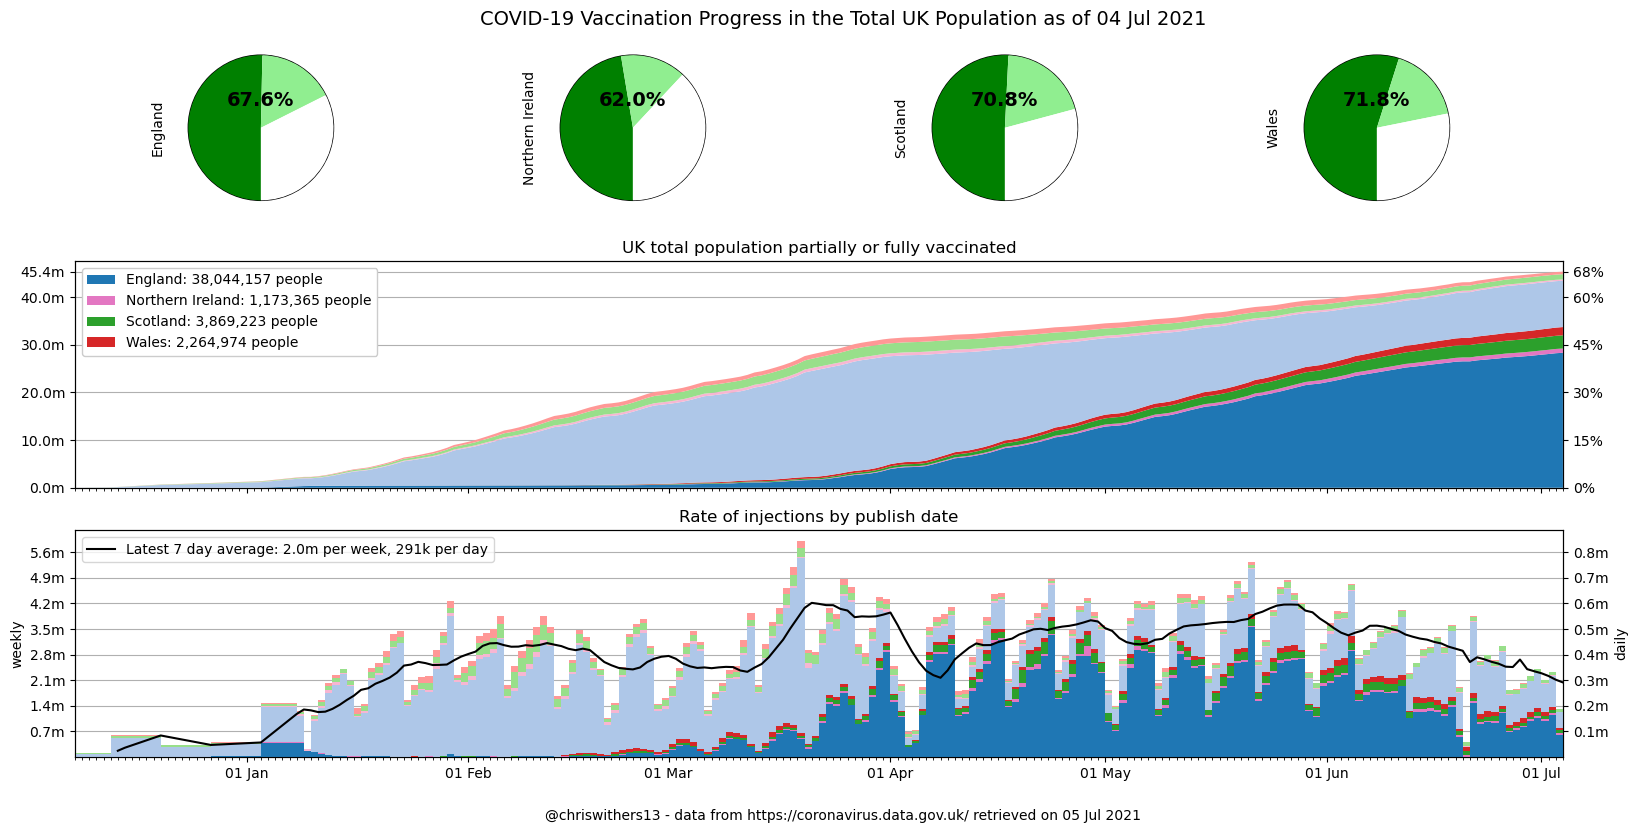

In [8]:
results = vaccination_dashboard()
partial = results['any'].sum()
population = results['population'].sum()
display(results, f"partial: {partial:,.0f} ({partial/population:.1%}), full: {results['full'].sum():,.0f}")

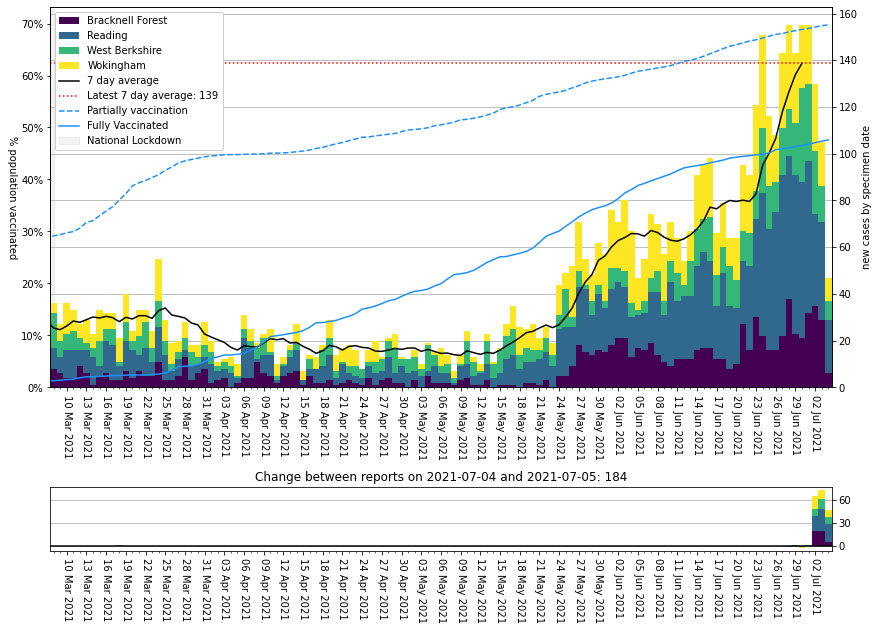

In [26]:
plot_areas(for_date, areas=my_areas, earliest=lockdown3[1], lines=population_vaccinated)

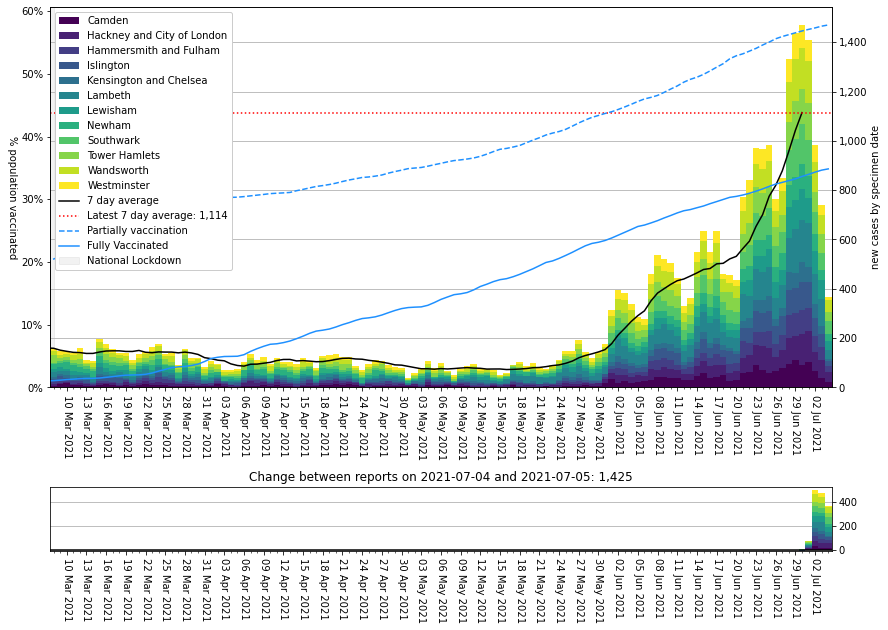

In [10]:
plot_areas(for_date, areas=london_areas, earliest=lockdown3[1], lines=population_vaccinated)

In [11]:
data = recent_phe_data_summed(for_date)
top_10_cols = [area_name,per100k,new_cases_by_specimen_date, specimen_date]

In [12]:
top_10 = data.sort_values(per100k, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E08000023,South Tyneside,829.270877,1252.0,2021-07-04
S12000042,Dundee City,827.752478,1236.0,2021-07-04
E07000199,Tamworth,722.332325,554.0,2021-07-04
E08000024,Sunderland,677.697557,1882.0,2021-07-04
E08000021,Newcastle upon Tyne,676.309359,2048.0,2021-07-04
S12000019,Midlothian,672.723340,622.0,2021-07-04
E08000037,Gateshead,672.094232,1358.0,2021-07-04
E06000012,North East Lincolnshire,648.646616,1035.0,2021-07-04
E08000022,North Tyneside,595.922333,1239.0,2021-07-04


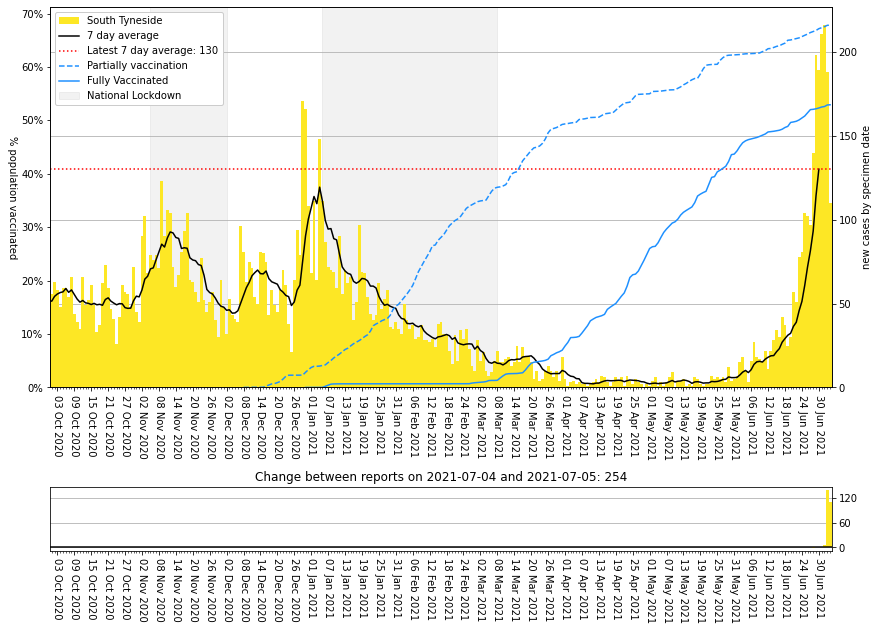

In [13]:
plot_areas(for_date, areas=[top_10.iloc[0].name], colormap='viridis_r', lines=population_vaccinated)

In [14]:
top_10 = data.sort_values(new_cases_by_specimen_date, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E08000035,Leeds,431.576306,3423.0,2021-07-04
E08000025,Birmingham,272.898611,3116.0,2021-07-04
E06000047,County Durham,581.406317,3082.0,2021-07-04
S12000049,Glasgow City,447.308567,2832.0,2021-07-04
S12000036,City of Edinburgh,530.737432,2786.0,2021-07-04
E08000003,Manchester,471.730535,2608.0,2021-07-04
E08000012,Liverpool,451.367555,2248.0,2021-07-04
E08000021,Newcastle upon Tyne,676.309359,2048.0,2021-07-04
E06000023,"Bristol, City of",410.033299,1900.0,2021-07-04


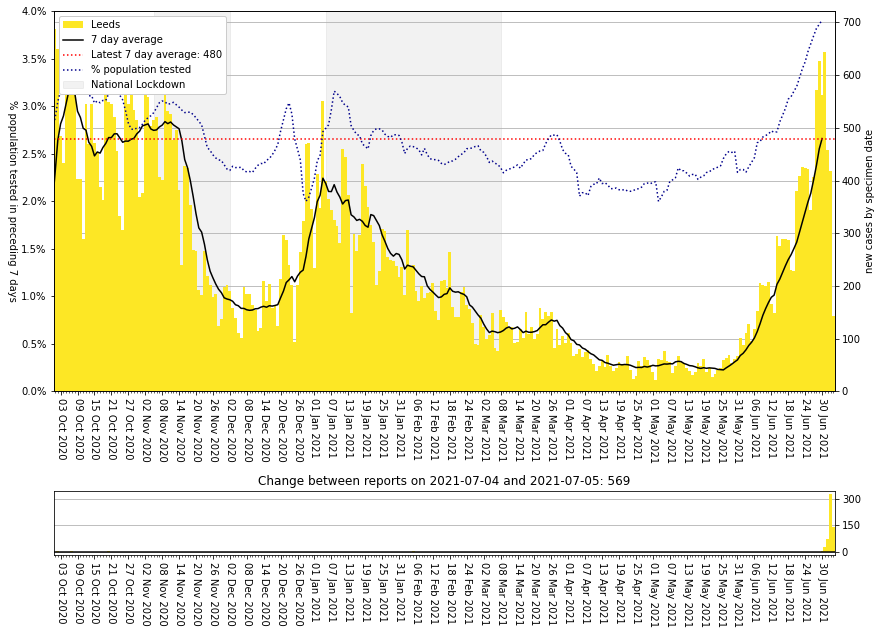

In [15]:
plot_areas(for_date, areas=[top_10.iloc[0].name], colormap='viridis_r', lines=unique_people_tested)

In [16]:
zoe_date, zoe_df = zoe_map_data()
phe_recent_date, phe_recent_geo, phe_recent_title = phe_map_data(for_date)
zoe_max = 2.5
phe_max = 0.8

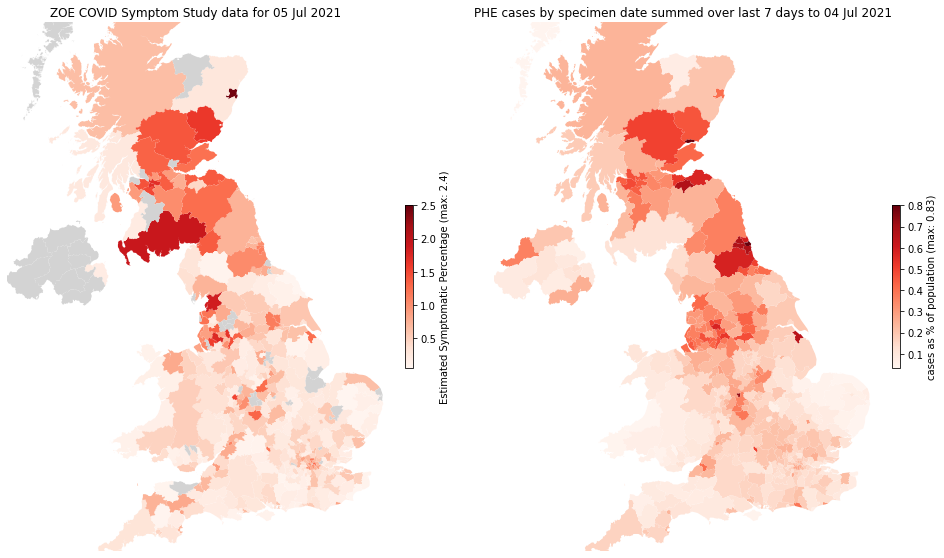

In [17]:
matplotlib_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

In [18]:
bokeh_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

Loading BokehJS ...